**INTRODUÇÃO**
Identificar e satisfazer curiosidades sobre fatores que ocasionam o churn de alguns clientes.

In [1]:
# manipulação dos dados
import numpy as np
import pandas as pd
from scipy.stats import skew

# sistema
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# exploração dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# configurações
plt.style.use('ggplot')

In [2]:
# churn_data = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
churn_data = pd.read_csv('Bank Customer Churn Prediction.csv')
churn_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.nunique().sort_values()

gender                  2
credit_card             2
active_member           2
churn                   2
country                 3
products_number         4
tenure                 11
age                    70
credit_score          460
balance              6382
estimated_salary     9999
customer_id         10000
dtype: int64

In [4]:
churn_data.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
min_balance = churn_data.balance.min()
max_balance = churn_data.balance.max()
print(f'Saldo mínimo: {min_balance}\nSaldo máximo: {max_balance}')

Saldo mínimo: 0.0
Saldo máximo: 250898.09


In [6]:
min_salary = churn_data.estimated_salary.min()
max_salary = churn_data.estimated_salary.max()
print(f'Salário mínimo: {min_salary}\nSalário máximo: {max_salary}')

Salário mínimo: 11.58
Salário máximo: 199992.48


In [7]:
zero_balance = churn_data.query("balance == 0")
zero_balance

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [8]:
churn_data.query(f"balance in {churn_data.balance.nlargest(3).to_list()} or estimated_salary in {churn_data.estimated_salary.nlargest(3).to_list()}")

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
3580,15634359,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,15697270,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
6646,15662021,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1


ANÁLISE EXPLORATÓRIA

In [9]:
gender_count = churn_data.gender.value_counts(normalize=True)
gender_count

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

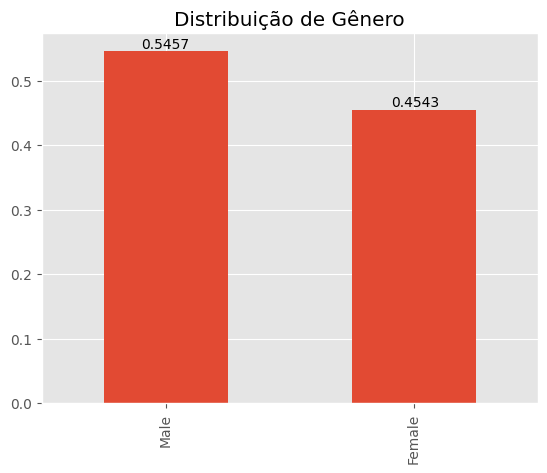

In [10]:
gender_count.plot.bar()
plt.title('Distribuição de Gênero')
_ = plt.text(-0.1, 0.55, gender_count[0])
_ = plt.text(0.91, 0.46, gender_count[1])

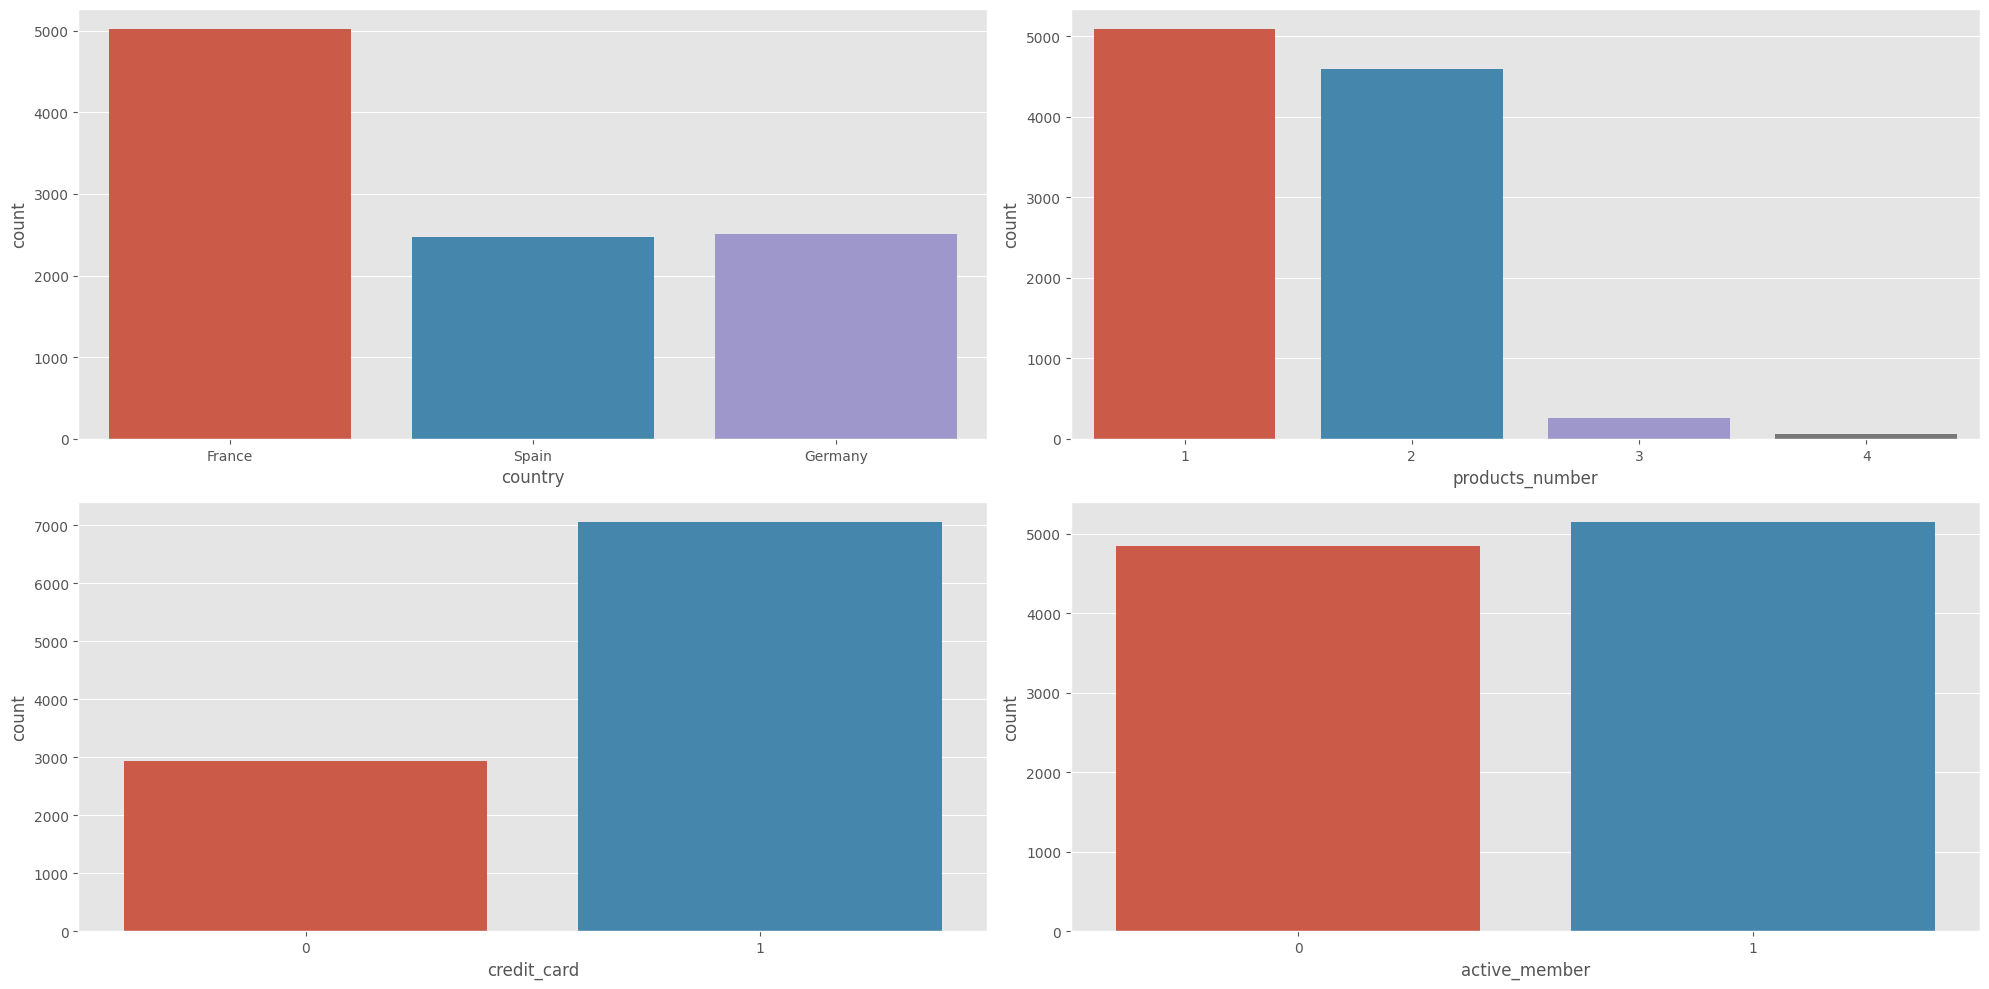

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
_ = sns.countplot(data=churn_data, x='country', ax=axes[0][0])
_ = sns.countplot(data=churn_data, x='products_number', ax=axes[0][1])
_ = sns.countplot(data=churn_data, x='credit_card', ax=axes[1][0])
_ = sns.countplot(data=churn_data, x='active_member', ax=axes[1][1])
_ = plt.tight_layout()

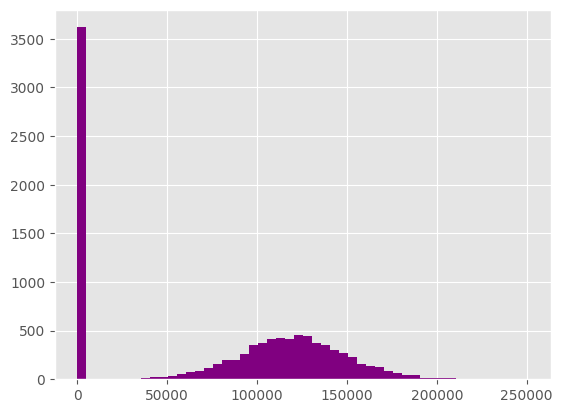

In [12]:
_ = plt.hist(churn_data.balance, bins=50, color='purple')

In [13]:
print(f'O número de clientes que não possuem saldo é de {len(zero_balance)}.')

O número de clientes que não possuem saldo é de 3617.


C:\Users\rlope\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


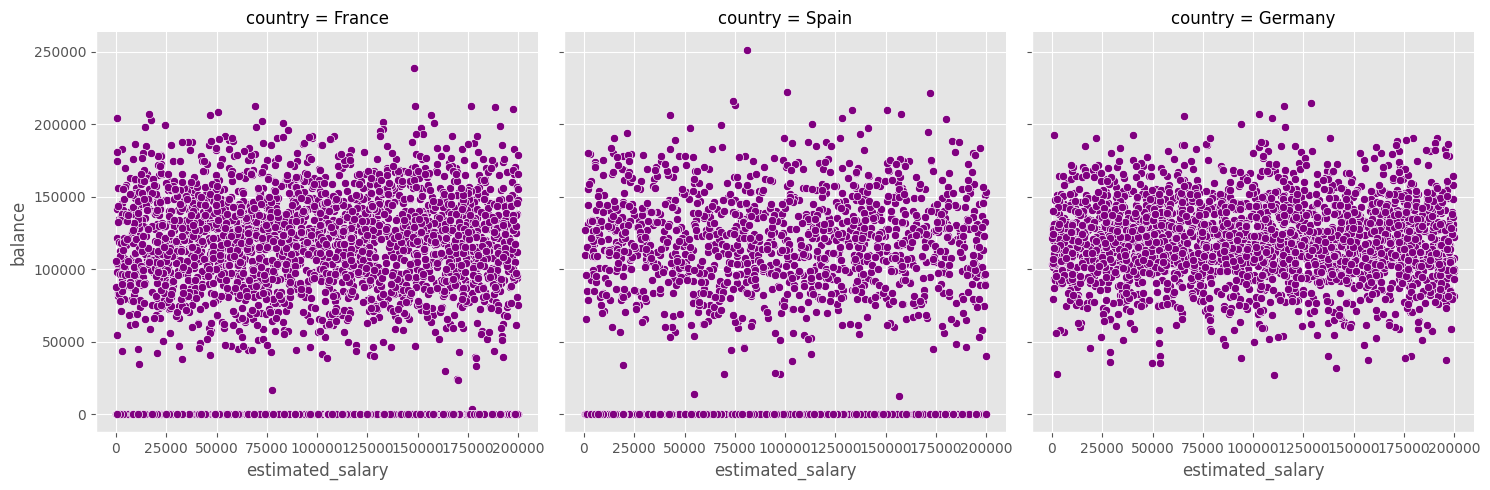

In [14]:
_ = sns.relplot(x = 'estimated_salary', y = 'balance', data=churn_data, col='country', color='purple')

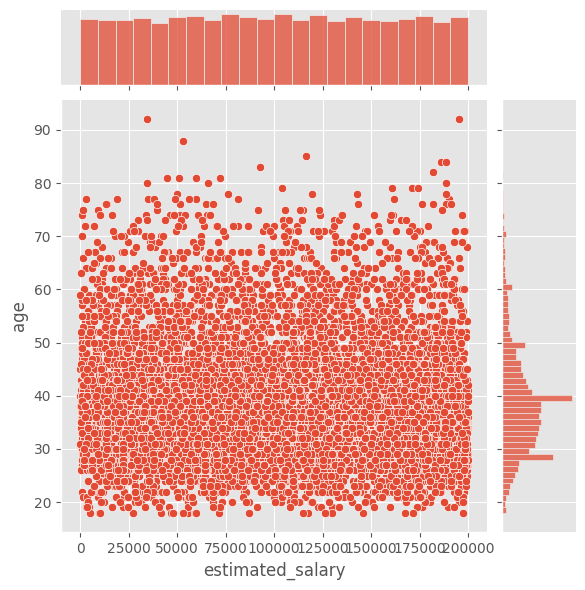

In [15]:
_ = sns.jointplot(x='estimated_salary', y='age', data=churn_data)

ANÁLISE DE CHURN

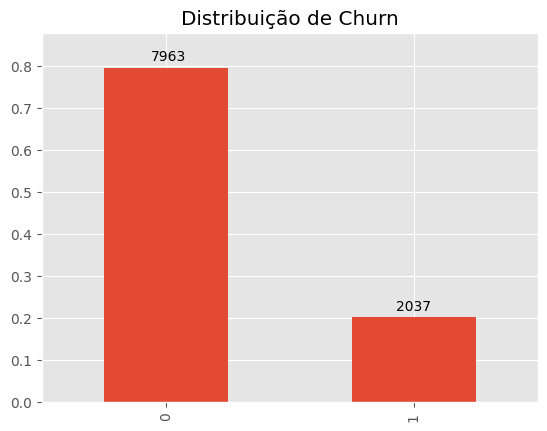

In [16]:
_ = churn_data.churn.value_counts(1).plot.bar()
_ = plt.title('Distribuição de Churn')
_ = plt.text(-0.06, 0.815, churn_data.churn.value_counts(0)[0])
_ = plt.text(0.93, 0.22, churn_data.churn.value_counts(0)[1])
_ = plt.ylim(0, 0.88)

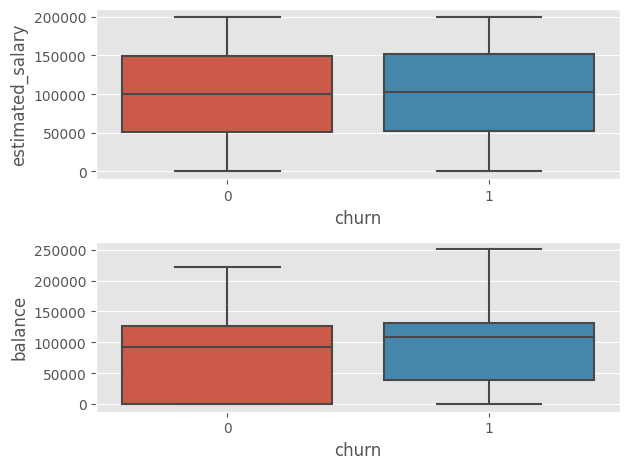

In [17]:
fig, axes = plt.subplots(2, 1)
_ = sns.boxplot(data=churn_data, x = 'churn', y='estimated_salary', ax=axes[0])
_ = sns.boxplot(data=churn_data, x = 'churn', y='balance', ax=axes[1])
_ = fig.tight_layout()

O salário não aparenta ser um dos fatores que ocasionam o churn. Curiosamente, o saldo parece ser um fator importante, já que pessoas que dão churn, possuem saldo maior.

In [18]:
churn_data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
churn_data.groupby('churn')['balance'].median()

churn
0     92072.68
1    109349.29
Name: balance, dtype: float64

In [20]:
churn_data.groupby('churn')['balance'].mean()

churn
0    72745.296779
1    91108.539337
Name: balance, dtype: float64

In [21]:
churn_data.groupby('churn').agg({'balance': ['mean', 'median']})

balance           
               mean     median
churn                         
0      72745.296779   92072.68
1      91108.539337  109349.29

In [22]:
agg_func = {
    'estimated_salary':['min', 'median', 'mean', 'std', skew],
    'balance':['min', 'median', 'mean', 'std', skew],
    'age':['min', 'median', 'mean', 'std', skew]
}

churn_data.groupby('churn').agg(agg_func)

estimated_salary                                                    \
                   min     median           mean           std      skew   
churn                                                                      
0                90.07   99645.04   99738.391772  57405.586966  0.010994   
1                11.58  102460.84  101465.677531  57912.418071 -0.033080   

      balance                                                  age         \
          min     median          mean           std      skew min median   
churn                                                                       
0         0.0   92072.68  72745.296779  62848.040701 -0.046879  18   36.0   
1         0.0  109349.29  91108.539337  58360.794816 -0.512354  18   45.0   

                                       
            mean        std      skew  
churn                                  
0      37.408389  10.125363  1.377439  
1      44.837997   9.761562  0.077920

<Axes: xlabel='churn', ylabel='age'>

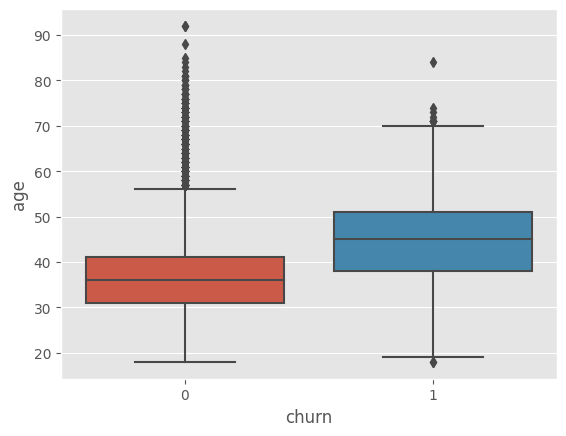

In [23]:
sns.boxplot(data=churn_data, x = 'churn', y='age')

A idade aparenta ser outro fator que pode causar o churn. Clientes com uma idade média de 45 anos possuem maior chance de deixar o banco.

In [24]:
churn_data.groupby('churn').agg({'credit_score':['min','max','mean', 'median']})

credit_score                        
               min  max        mean median
churn                                     
0              405  850  651.853196  653.0
1              350  850  645.351497  646.0

HIPÓTESE

In [25]:
france_data = churn_data[churn_data['country'] == 'France']
spain_data = churn_data[churn_data['country'] == 'Spain']
germany_data = churn_data[churn_data['country'] == 'Germany']

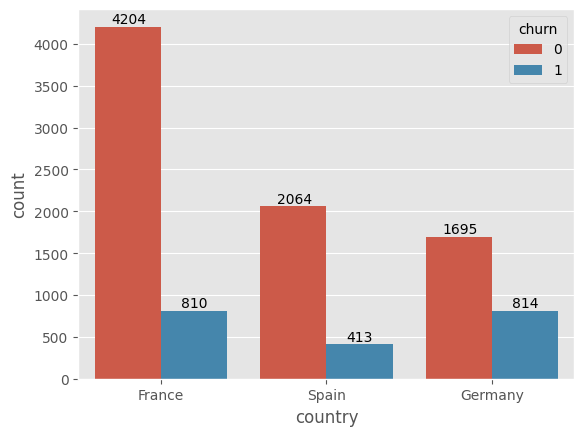

In [26]:
sns.countplot(data=churn_data, x='country', hue='churn')
# France
_ = plt.text(-0.3, 4250, str(france_data['churn'].value_counts(0)[0]))
_ = plt.text(0.12, 850, str(france_data['churn'].value_counts(0)[1]))
# Spain
_ = plt.text(0.70, 2100, str(spain_data['churn'].value_counts(0)[0]))
_ = plt.text(1.12, 450, str(spain_data['churn'].value_counts(0)[1]))
# Germany
_ = plt.text(1.7, 1740, str(germany_data['churn'].value_counts(0)[0]))
_ = plt.text(2.12, 850, str(germany_data['churn'].value_counts(0)[1]))

In [27]:
churn_data.groupby('country')['churn'].mean().sort_values()

country
France     0.161548
Spain      0.166734
Germany    0.324432
Name: churn, dtype: float64

In [28]:
churn_data.groupby('credit_card')['churn'].mean().sort_values()

credit_card
1    0.201843
0    0.208149
Name: churn, dtype: float64

In [29]:
churn_data.groupby('products_number')['churn'].mean().sort_values()

products_number
2    0.075817
1    0.277144
3    0.827068
4    1.000000
Name: churn, dtype: float64

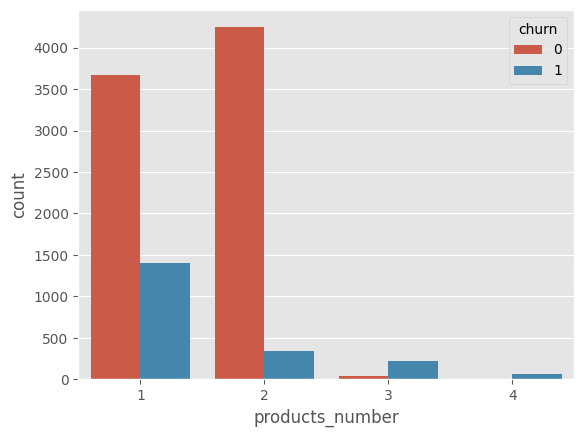

In [30]:
products_churn = sns.countplot(data=churn_data, x='products_number', hue='churn')
sns.move_legend(products_churn, loc='upper right')

In [31]:
churn_data.groupby('gender')['churn'].mean().sort_values()

gender
Male      0.164559
Female    0.250715
Name: churn, dtype: float64

CONCLUSÃO

A análise acima mostra alguns fatores relevantes para o churn, como o saldo, idade, gênero, país e número de produtos.
Nota-se que clientes com maior saldo tem mais propensão ao churn.
Clientes com idade média acima de 45 anos, mulheres, alemães e aqueles que possuem três ou mais produtos também tem um índice de churn maior.